# LOADING DATA IN PYTORCH

> PyTorch includes packages to prepare and load common datasets for your model.<br/>
At the heart of PyTorch data loading utility is the `torch.utils.data.DataLoader` class. It represents a Python iterable over a dataset. Libraries in PyTorch offer built-in high-quality datasets for you to use in `torch.utils.data.Dataset`. These datasets are currently available in:
- [torchvision](https://pytorch.org/docs/stable/torchvision/datasets.html)
- [torchaudio](https://pytorch.org/audio/datasets.html)
- [torchtext](https://pytorch.org/text/datasets.html)

In this example, we will use `torchaudio` to load one of the audio datasets available: The YESNO dataset. This dataset contains 60 recording of a male person saying 8 words; each word is either the Hebrew for `yes` or `no`, so each file is a random sequence of 8 yes-es or noes.

Source: [Original YESNO dataset](https://www.openslr.org/1/)

In [51]:
import torchaudio
import torch
import matplotlib.pyplot as plt

We will use `torchaudio` to download the dataset. Then, we can use `torch.utils.data.DataLoader` to load the data.

In [33]:
yesno_data = torchaudio.datasets.YESNO('../../data/processed', download=True)
data_loader = torch.utils.data.DataLoader(yesno_data,
                                          batch_size=1,
                                          shuffle=True,
                                          num_workers=4)

In [34]:
# Let's check the length of the dataset
len(data_loader.dataset)

60

Each recording will have a `tuple` with a `waveform`, `framerate` and `target`.

In [41]:
# Let's take the first audio in the dataset as an example
waveform, framerate, target = data_loader.dataset[0]

 We can use 
```python
from IPython.display import Audio
```
to play audio directly in an IPython notebook

In [42]:
# Let's import the Audio module
from IPython.display import Audio

In [48]:
# The waveform
print(waveform.shape)
print(framerate)
print(f'This target {target} is equivalent to ["no","no","yes","no","no","no","yes","no"] in hebrew')

torch.Size([1, 48560])
8000
This target [0, 0, 1, 0, 0, 0, 1, 0] is equivalent to ["no","no","yes","no","no","no","yes","no"] in hebrew


To play the content of the audio, we will need to pass the waveform and the framerate to `Audio`.

Now let's heard the content of the audio:

In [66]:
Audio(waveform, rate=framerate)

We can also visualise the audio:

Shape of waveform: torch.Size([1, 48560])
Frame of waveform: 8000


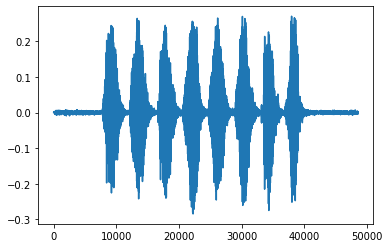

In [52]:
print("Shape of waveform: {}".format(waveform.size()))
print("Frame of waveform: {}".format(framerate))

plt.figure()
plt.plot(waveform.t().numpy())

There are more advanced ways to visualise audio. Consider the examples below were we will be able to visualise a `log spectogram` and `MelSpectogram`. We won't go deeper into those concepts but it's important to understand that sound can be also represented as images and DNNs have demonstrated to be really good at finding patterns in images (In particular, Convolutional Neural Networks). We will talk more about it in the coming lessons.

Source: [Spectograms](https://en.wikipedia.org/wiki/Spectrogram)
A spectrogram is a visual representation of the spectrum of frequencies of a signal as it varies with time. 



Shape of spectrogram: torch.Size([1, 201, 243])


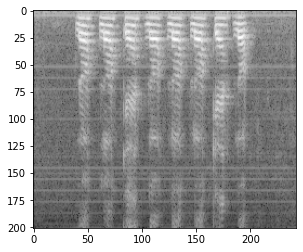

In [53]:
specgram = torchaudio.transforms.Spectrogram()(waveform)

print("Shape of spectrogram: {}".format(specgram.size()))

plt.figure()
plt.imshow(specgram.log2()[0,:,:].numpy(), cmap='gray')

Let's check another type spectogram called Mel Spectogram:

Shape of spectrogram: torch.Size([1, 128, 243])


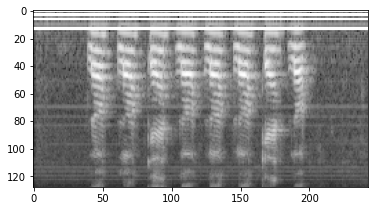

In [68]:
specgram = torchaudio.transforms.MelSpectrogram()(waveform)
print("Shape of spectrogram: {}".format(specgram.size()))
plt.figure()
p = plt.imshow(specgram.log2()[0,:,:].detach().numpy(), cmap='gray')

We can also resample audio, hopefully without losing too much information

Shape of transformed waveform: torch.Size([1, 9712])


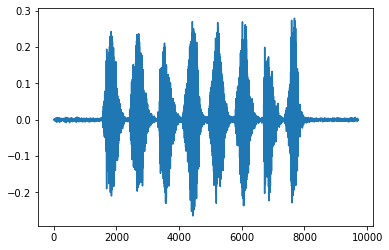

In [63]:
new_sample_rate = framerate/5

# Since Resample applies to a single channel, we resample first channel here
channel = 0
transformed = torchaudio.transforms.Resample(framerate, new_sample_rate)(waveform[channel,:].view(1,-1))

print("Shape of transformed waveform: {}".format(transformed.size()))

plt.figure()
plt.plot(transformed[0,:].numpy())

Shape of spectrogram: torch.Size([1, 201, 243])


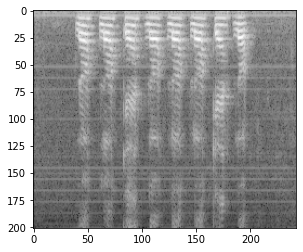

In [70]:
specgram = torchaudio.transforms.Spectrogram()(waveform)

print("Shape of spectrogram: {}".format(specgram.size()))

plt.figure()
plt.imshow(specgram.log2()[0,:,:].numpy(), cmap='gray')

In [71]:
# Let's check if the tensor is in the interval [-1,1]
print("Min of waveform: {}\nMax of waveform: {}\nMean of waveform: {}".format(waveform.min(), waveform.max(), waveform.mean()))

Min of waveform: -0.284393310546875
Max of waveform: 0.26995849609375
Mean of waveform: -6.523320735141169e-06


We will need to normalise the waveform.

<div class="alert alert-info" style="font-size:100%">
    <b>NOTE:</b> <br>
Remember that DNNs perform very poorly when their data it's not normalised. Regardless of the format of the input (audio, images, tabular), it's always important to normalise the inputs when training Neural Networks.

</div>

In [73]:
def normalize(tensor):
    # Subtract the mean, and scale to the interval [-1,1]
    tensor_minusmean = tensor - tensor.mean()
    return tensor_minusmean/tensor_minusmean.abs().max()

# Let's normalize to the full interval [-1,1]
waveform = normalize(waveform)

In [74]:
# Let's check if the tensor is in the interval [-1,1]
print("Min of waveform: {}\nMax of waveform: {}\nMean of waveform: {}".format(waveform.min(), waveform.max(), waveform.mean()))

Min of waveform: -1.0
Max of waveform: 0.9492881894111633
Mean of waveform: 1.8176948834991435e-09


In [75]:
Audio(waveform, rate=framerate)

Find more about preprocessing audio with Pytorch [here](https://pytorch.org/tutorials/beginner/audio_preprocessing_tutorial.html)